In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [15]:
input_size = 28 * 28
num_classes = 10
batch_size = 64
epochs = 50
learning_rates = [0.0001, 0.01, 0.1, 1.0]

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)


In [10]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.linear(x)


In [11]:
def train_model(learning_rate):
    model = LogisticRegression(input_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        for images, labels in train_loader:

            images = images.reshape(-1, input_size)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        losses.append(epoch_loss / len(train_loader))
        print(f"Learning Rate: {learning_rate}, Epoch [{epoch+1}/{epochs}], Loss: {losses[-1]:.4f}")

    return losses



Training with learning rate: 0.0001
Learning Rate: 0.0001, Epoch [1/50], Loss: 2.1665
Learning Rate: 0.0001, Epoch [2/50], Loss: 1.8384
Learning Rate: 0.0001, Epoch [3/50], Loss: 1.5989
Learning Rate: 0.0001, Epoch [4/50], Loss: 1.4193
Learning Rate: 0.0001, Epoch [5/50], Loss: 1.2825
Learning Rate: 0.0001, Epoch [6/50], Loss: 1.1761
Learning Rate: 0.0001, Epoch [7/50], Loss: 1.0915
Learning Rate: 0.0001, Epoch [8/50], Loss: 1.0230
Learning Rate: 0.0001, Epoch [9/50], Loss: 0.9664
Learning Rate: 0.0001, Epoch [10/50], Loss: 0.9191
Learning Rate: 0.0001, Epoch [11/50], Loss: 0.8787
Learning Rate: 0.0001, Epoch [12/50], Loss: 0.8439
Learning Rate: 0.0001, Epoch [13/50], Loss: 0.8137
Learning Rate: 0.0001, Epoch [14/50], Loss: 0.7870
Learning Rate: 0.0001, Epoch [15/50], Loss: 0.7634
Learning Rate: 0.0001, Epoch [16/50], Loss: 0.7423
Learning Rate: 0.0001, Epoch [17/50], Loss: 0.7235
Learning Rate: 0.0001, Epoch [18/50], Loss: 0.7062
Learning Rate: 0.0001, Epoch [19/50], Loss: 0.6907
Lear

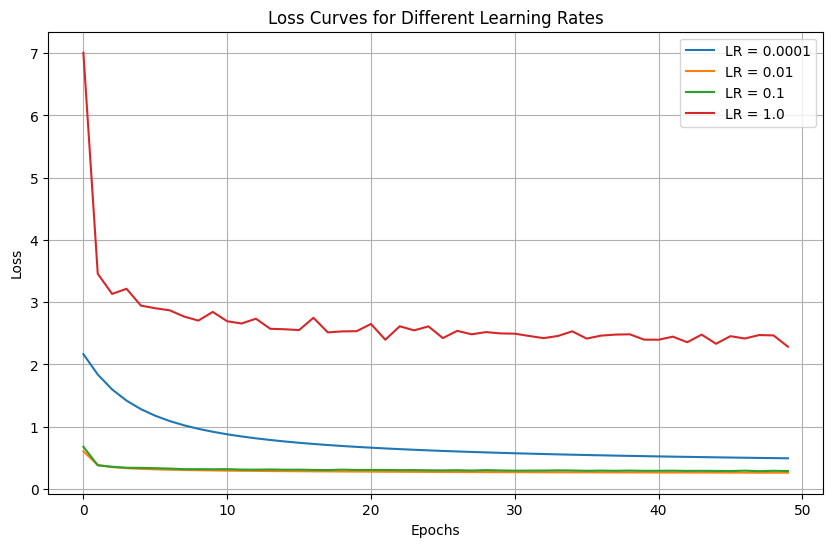

In [16]:
loss_curves = {}
for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    loss_curves[lr] = train_model(lr)

plt.figure(figsize=(10, 6))
for lr, losses in loss_curves.items():
    plt.plot(losses, label=f"LR = {lr}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curves for Different Learning Rates")
plt.legend()
plt.grid()
plt.show()